In [16]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import spotipy
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import sys
!{sys.executable} -m pip install Pillow
!{sys.executable} -m pip install wordcloud
!{sys.executable} -m pip install -U nltk
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
nltk.download('punkt')
nltk.download('stopwords')
# https://developer.spotify.com/console/get-playlist-tracks/?playlist_id=37i9dQZF1DX5Ejj0EkURtP&market=&fields=&limit=&offset= 
# use above website to generate token
token = "BQCEGu1yUdrdsKQU8_OO10gxBXcoVEnpZoqMGiQnqVACepMVwIxiwDbsI1CmENFiWhoWheYv5SyB7zIuZZWQIttW3jqCbk9DTsmMP0luiCmMUo003hi_WGM1rIYzh5c-yQGyT58abe-VzPepew"

You are using pip version 9.0.3, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.3, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Requirement already up-to-date: nltk in /opt/conda/lib/python3.6/site-packages
Requirement already up-to-date: six in /opt/conda/lib/python3.6/site-packages (from nltk)
Requirement already up-to-date: singledispatch in /opt/conda/lib/python3.6/site-packages (from nltk)
You are using pip version 9.0.3, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
#this gets the 2010s playlist - have to update token if it expires
r_10s = requests.get("https://api.spotify.com/v1/playlists/37i9dQZF1DX5Ejj0EkURtP", headers={'Authorization': 'Bearer ' + token})
r_00s = requests.get("https://api.spotify.com/v1/playlists/37i9dQZF1DX4o1oenSJRJd", headers={'Authorization': 'Bearer ' + token})
r_90s = requests.get("https://api.spotify.com/v1/playlists/37i9dQZF1DXbTxeAdrVG2l", headers={'Authorization': 'Bearer ' + token})
r_80s = requests.get("https://api.spotify.com/v1/playlists/37i9dQZF1DX4UtSsGT1Sbe", headers={'Authorization': 'Bearer ' + token})
r_70s = requests.get("https://api.spotify.com/v1/playlists/37i9dQZF1DWTJ7xPn4vNaz", headers={'Authorization': 'Bearer ' + token})
r_60s = requests.get("https://api.spotify.com/v1/playlists/37i9dQZF1DXaKIA8E7WcJj", headers={'Authorization': 'Bearer ' + token})
r_50s = requests.get("https://api.spotify.com/v1/playlists/37i9dQZF1DWSV3Tk4GO2fq", headers={'Authorization': 'Bearer ' + token})


In [3]:
json_data = r_10s.json()
playlists_10 = json_normalize(json_data["tracks"]["items"], [['track', 'artists']], ['added_at', ['track', 'popularity'], ['track', 'id'], ['track', 'name'], ['track', 'duration_ms']], errors='ignore')
playlists_10 = playlists_10.drop(columns=['external_urls', 'href', 'type', 'uri'])

playlists_10

,id,name,added_at,track.popularity,track.id,track.name,track.duration_ms
0,4UXqAaa6dQYAk18Lv7PEgX,Fall Out Boy,2018-12-01T17:58:03Z,62,3x7NGlfDKQYN2wnwEnL7r9,The Kids Aren't Alright,260920
1,3NPpFNZtSTHheNBaWC82rB,X Ambassadors,2018-12-01T17:58:03Z,76,7lGKEWMXVWWTt3X71Bv44I,Unsteady,193546
2,10exVja0key0uqUkk6LJRT,Vance Joy,2018-12-01T17:58:03Z,56,7lrDNvF3TwuC5vC2fGiMjy,Mess Is Mine,223640
3,4BxCuXFJrSWGi1KHcVqaU4,Kodaline,2018-12-01T17:58:03Z,69,2PwXOevGUSkU8qaYZjgLq2,All I Want,305746
4,246dkjvS1zLTtiykXe5h60,Post Malone,2018-12-01T17:58:03Z,86,75ZvA4QfFiZvzhj2xkaWAh,I Fall Apart,223346
5,536BYVgOnRky0xjsPT96zl,Two Door Cinema Club,2018-12-01T17:58:03Z,69,1qfYG2JrchEyJiqKnkE7YQ,What You Know,189693
6,2WzaAvm2bBCf4pEhyuDgCY,Ruth B.,2018-12-01T17:58:03Z,76,4h0zU3O9R5xzuTmNO7dNDU,Lost Boy,275280
7,10exVja0key0uqUkk6LJRT,Vance Joy,2018-12-01T17:58:03Z,28,6uEIbSu5Omm6Rg2hcVrfJH,Georgia,230506
8,4BxCuXFJrSWGi1KHcVqaU4,Kodaline,2018-12-01T17:58:03Z,69,7jDe24vXWUNX8Jl2hZHrIS,High Hopes,230266
9,36jaGQtMj5UWD0eO1fCVdD,Joel Adams,2018-12-01T17:58:03Z,76,3cNjgVBKTJ1SvKhunrCdVy,Please Don't Go,210580


In [4]:
json_data = r_10s.json()
playlists_10 = json_normalize(json_data["tracks"]["items"], [['track', 'artists']], ['added_at', ['track', 'popularity'], ['track', 'id'], ['track', 'name'], ['track', 'duration_ms']], errors='ignore')
playlists_10 = playlists_10.drop(columns=['external_urls', 'href', 'type', 'uri'])

json_data_00 = r_00s.json()
playlists_00 = json_normalize(json_data_00["tracks"]["items"], [['track', 'artists']], ['added_at', ['track', 'popularity'], ['track', 'id'], ['track', 'name'], ['track', 'duration_ms']], errors='ignore')
playlists_00 = playlists_00.drop(columns=['external_urls', 'href', 'type', 'uri'])

json_data_90 = r_90s.json()
playlists_90 = json_normalize(json_data_90["tracks"]["items"], [['track', 'artists']], ['added_at', ['track', 'popularity'], ['track', 'id'], ['track', 'name'], ['track', 'duration_ms']], errors='ignore')
playlists_90 = playlists_90.drop(columns=['external_urls', 'href', 'type', 'uri'])

json_data_80 = r_80s.json()
playlists_80 = json_normalize(json_data_80["tracks"]["items"], [['track', 'artists']], ['added_at', ['track', 'popularity'], ['track', 'id'], ['track', 'name'], ['track', 'duration_ms']], errors='ignore')
playlists_80 = playlists_80.drop(columns=['external_urls', 'href', 'type', 'uri'])

json_data_70 = r_70s.json()
playlists_70 = json_normalize(json_data_70["tracks"]["items"], [['track', 'artists']], ['added_at', ['track', 'popularity'], ['track', 'id'], ['track', 'name'], ['track', 'duration_ms']], errors='ignore')
playlists_70 = playlists_70.drop(columns=['external_urls', 'href', 'type', 'uri'])

json_data_60 = r_60s.json()
playlists_60 = json_normalize(json_data_60["tracks"]["items"], [['track', 'artists']], ['added_at', ['track', 'popularity'], ['track', 'id'], ['track', 'name'], ['track', 'duration_ms']], errors='ignore')
playlists_60 = playlists_60.drop(columns=['external_urls', 'href', 'type', 'uri'])

json_data_50 = r_50s.json()
playlists_50 = json_normalize(json_data_50["tracks"]["items"], [['track', 'artists']], ['added_at', ['track', 'popularity'], ['track', 'id'], ['track', 'name'], ['track', 'duration_ms']], errors='ignore')
playlists_50 = playlists_50.drop(columns=['external_urls', 'href', 'type', 'uri'])

playlists_80

,id,name,added_at,track.popularity,track.id,track.name,track.duration_ms
0,4QTVePrFu1xuGM9K0kNXkk,Dexys Midnight Runners,2018-12-01T18:05:10Z,29,5uzNa0SBGOe5pPnstWHMCt,Come On Eileen,273720
1,0PFtn5NtBbbUNbU9EAmIWF,Toto,2018-12-01T18:05:10Z,67,5tJjo5JDF9zhzYD7yQfATH,Africa,296000
2,77tT1kLj6mCWtFNqiOmP9H,Daryl Hall & John Oates,2018-12-01T18:05:10Z,76,4o6BgsqLIBViaGVbx5rbRk,You Make My Dreams,190626
3,6zFYqv1mOsgBRQbae3JJ9e,Billy Joel,2018-12-01T18:05:10Z,75,5zA8vzDGqPl2AzZkEYQGKh,Uptown Girl,197706
4,4bthk9UfsYUYdcFyqxmSUU,Tears For Fears,2018-12-01T18:05:10Z,78,4RvWPyQ5RL0ao9LPZeSouE,Everybody Wants To Rule The World,251488
5,6IFXsrXBpwbIqtOUOiAa3p,Rick Springfield,2018-12-01T18:05:10Z,60,2F1fnE1a8zQCogM6jJifHH,Jessie's Girl,194266
6,3RGLhK1IP9jnYFH4BRFJBS,The Clash,2018-12-01T18:05:10Z,76,39shmbIHICJ2Wxnk1fPSdz,Should I Stay or Should I Go - Remastered,188986
7,2UZMlIwnkgAEDBsw1Rejkn,Tom Petty,2018-12-01T18:05:10Z,60,0Ir0Esfpcg0EB6Kq8VbbAh,I Won't Back Down,175733
8,2jzc5TC5TVFLXQlBNiIUzE,a-ha,2018-12-01T18:05:10Z,81,2WfaOiMkCvy7F5fcp2zZ8L,Take On Me,225280
9,2hO4YtXUFJiUYS2uYFvHNK,Traveling Wilburys,2018-12-01T18:05:10Z,66,4HA2jo7wkMdN1lmLO6ryzE,End Of The Line,209520


In [5]:
aggregation_functions = {'name': 'first', 'track.id': 'first', 'track.duration_ms': 'first', 'added_at': 'first', 'track.popularity' : 'first'}
df_new = playlists_10.groupby(playlists_10['track.name']).aggregate(aggregation_functions)

aggregation_functions = {'name': 'first', 'track.id': 'first', 'track.duration_ms': 'first', 'added_at': 'first', 'track.popularity' : 'first'}
grouped_00 = playlists_00.groupby(playlists_00['track.name']).aggregate(aggregation_functions)

aggregation_functions = {'name': 'first', 'track.id': 'first', 'track.duration_ms': 'first', 'added_at': 'first', 'track.popularity' : 'first'}
grouped_90 = playlists_90.groupby(playlists_90['track.name']).aggregate(aggregation_functions)

aggregation_functions = {'name': 'first', 'track.id': 'first', 'track.duration_ms': 'first', 'added_at': 'first', 'track.popularity' : 'first'}
grouped_80 = playlists_80.groupby(playlists_80['track.name']).aggregate(aggregation_functions)

aggregation_functions = {'name': 'first', 'track.id': 'first', 'track.duration_ms': 'first', 'added_at': 'first', 'track.popularity' : 'first'}
grouped_70 = playlists_70.groupby(playlists_70['track.name']).aggregate(aggregation_functions)

aggregation_functions = {'name': 'first', 'track.id': 'first', 'track.duration_ms': 'first', 'added_at': 'first', 'track.popularity' : 'first'}
grouped_60 = playlists_60.groupby(playlists_60['track.name']).aggregate(aggregation_functions)

aggregation_functions = {'name': 'first', 'track.id': 'first', 'track.duration_ms': 'first', 'added_at': 'first', 'track.popularity' : 'first'}
grouped_50 = playlists_50.groupby(playlists_50['track.name']).aggregate(aggregation_functions)


In [6]:
track_ids = df_new['track.id'].tolist()
track_str = '%2C'.join(track_ids)
t = requests.get("https://api.spotify.com/v1/audio-features?ids=" + track_str, headers={'Authorization': 'Bearer ' + token})
track_info_df = json_normalize(t.json()['audio_features'])
track_info_df = track_info_df.drop(columns=['analysis_url', 'mode', 'track_href', 'type', 'uri'])

track_ids_00 = grouped_00['track.id'].tolist()
track_str_00 = '%2C'.join(track_ids_00)
t_00s = requests.get("https://api.spotify.com/v1/audio-features?ids=" + track_str_00, headers={'Authorization': 'Bearer ' + token})
track_info_00 = json_normalize(t_00s.json()['audio_features'])
track_info_00 = track_info_00.drop(columns=['analysis_url', 'mode', 'track_href', 'type', 'uri'])

track_ids_90 = grouped_90['track.id'].tolist()
track_str_90 = '%2C'.join(track_ids_90)
t_90s = requests.get("https://api.spotify.com/v1/audio-features?ids=" + track_str_90, headers={'Authorization': 'Bearer ' + token})
track_info_90 = json_normalize(t_90s.json()['audio_features'])
track_info_90 = track_info_90.drop(columns=['analysis_url', 'mode', 'track_href', 'type', 'uri'])

track_ids_80 = grouped_80['track.id'].tolist()
track_str_80 = '%2C'.join(track_ids_80)
t_80s = requests.get("https://api.spotify.com/v1/audio-features?ids=" + track_str_80, headers={'Authorization': 'Bearer ' + token})
track_info_80 = json_normalize(t_80s.json()['audio_features'])
track_info_80 = track_info_80.drop(columns=['analysis_url', 'mode', 'track_href', 'type', 'uri'])

track_ids_70 = grouped_70['track.id'].tolist()
track_str_70 = '%2C'.join(track_ids_70)
t_70s = requests.get("https://api.spotify.com/v1/audio-features?ids=" + track_str_70, headers={'Authorization': 'Bearer ' + token})
track_info_70 = json_normalize(t_70s.json()['audio_features'])
track_info_70 = track_info_70.drop(columns=['analysis_url', 'mode', 'track_href', 'type', 'uri'])

track_ids_60 = grouped_60['track.id'].tolist()
track_str_60 = '%2C'.join(track_ids_60)
t_60s = requests.get("https://api.spotify.com/v1/audio-features?ids=" + track_str_60, headers={'Authorization': 'Bearer ' + token})
track_info_60 = json_normalize(t_60s.json()['audio_features'])
track_info_60 = track_info_60.drop(columns=['analysis_url', 'mode', 'track_href', 'type', 'uri'])

track_ids_50 = grouped_50['track.id'].tolist()
track_str_50 = '%2C'.join(track_ids_50)
t_50s = requests.get("https://api.spotify.com/v1/audio-features?ids=" + track_str_50, headers={'Authorization': 'Bearer ' + token})
track_info_50 = json_normalize(t_50s.json()['audio_features'])
track_info_50 = track_info_50.drop(columns=['analysis_url', 'mode', 'track_href', 'type', 'uri'])

#track.name appears to be in the index so we need to reindex it
df_index = df_new.index
df_new.index = range(len(df_new))
df_new["track.name"] = df_index

grouped_50_index = grouped_50.index
grouped_50.index = range(len(grouped_50))
grouped_50["track.name"] = grouped_50.index

grouped_60_index = grouped_60.index
grouped_60.index = range(len(grouped_60))
grouped_60["track.name"] = grouped_60.index

grouped_70_index = grouped_70.index
grouped_70.index = range(len(grouped_70))
grouped_70["track.name"] = grouped_70.index

grouped_80_index = grouped_80.index
grouped_80.index = range(len(grouped_80))
grouped_80["track.name"] = grouped_80.index

grouped_90_index = grouped_90.index
grouped_90.index = range(len(grouped_90))
grouped_90["track.name"] = grouped_90.index

grouped_00_index = grouped_00.index
grouped_00.index = range(len(grouped_00))
grouped_00["track.name"] = grouped_00.index



In [7]:
data_2010s = pd.merge(df_new, track_info_df, left_on = 'track.id', right_on = 'id')
data_2000s = pd.merge(grouped_00, track_info_00, left_on = 'track.id', right_on = 'id')
data_1990s = pd.merge(grouped_90, track_info_90, left_on = 'track.id', right_on = 'id')
data_1980s = pd.merge(grouped_80, track_info_80, left_on = 'track.id', right_on = 'id')
data_1970s = pd.merge(grouped_70, track_info_70, left_on = 'track.id', right_on = 'id')
data_1960s = pd.merge(grouped_60, track_info_60, left_on = 'track.id', right_on = 'id')
data_1950s = pd.merge(grouped_50, track_info_50, left_on = 'track.id', right_on = 'id')





In [8]:
data_2010s['decade'] = '2010s'
data_2000s['decade'] = '2000s'
data_1990s['decade'] = '1990s'
data_1980s['decade'] = '1980s'
data_1970s['decade'] = '1970s'
data_1960s['decade'] = '1960s'
data_1950s['decade'] = '1950s'


In [9]:
decades_data = pd.concat([data_2010s, data_2000s, data_1990s, data_1980s, data_1970s, data_1960s, data_1950s])
decades_data['energy'].groupby(decades_data['decade']).describe()
decades_data # if track name doesn't show up, just restart the kernel

,name,track.id,track.duration_ms,added_at,track.popularity,track.name,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence,decade
0,Lukas Graham,7129iqBafaphfc3WPCGC0L,237300,2018-12-01T17:58:03Z,53,7 Years,0.29000,0.742,237300,0.479,7129iqBafaphfc3WPCGC0L,0.000000,10,0.3910,-5.830,0.0551,119.951,4,0.3460,2010s
1,Coldplay,6f49kbOuQSOsStBpyGvQfA,223773,2018-12-01T17:58:03Z,69,A Head Full Of Dreams,0.00200,0.450,223773,0.920,6f49kbOuQSOsStBpyGvQfA,0.020100,11,0.3340,-4.982,0.0733,122.979,4,0.0773,2010s
2,Paramore,1j8z4TTjJ1YOdoFEDwJTQa,296520,2018-12-01T17:58:03Z,70,Ain't It Fun,0.15400,0.610,296520,0.893,1j8z4TTjJ1YOdoFEDwJTQa,0.000044,9,0.0210,-3.681,0.0921,104.031,4,0.6730,2010s
3,Kodaline,2PwXOevGUSkU8qaYZjgLq2,305746,2018-12-01T17:58:03Z,69,All I Want,0.17200,0.209,305747,0.412,2PwXOevGUSkU8qaYZjgLq2,0.150000,0,0.0843,-9.733,0.0443,86.260,3,0.1620,2010s
4,Snakehips,6TaqooOXAEcijL6G1AWS2K,229746,2018-12-01T17:58:03Z,72,All My Friends (feat. Tinashe & Chance the Rap...,0.11900,0.689,229747,0.521,6TaqooOXAEcijL6G1AWS2K,0.000084,0,0.1080,-5.845,0.1320,95.055,4,0.1780,2010s
5,Niykee Heaton,3rvLfPT9sm9UPeIr8OQA65,245722,2018-12-01T17:58:03Z,13,Bad Intentions,0.22300,0.744,245723,0.722,3rvLfPT9sm9UPeIr8OQA65,0.000000,11,0.0960,-5.140,0.0778,124.008,4,0.3930,2010s
6,Mumford & Sons,7HqtFBLJcilvyUuMav4Y5W,220866,2018-12-01T17:58:03Z,15,Believe,0.03430,0.366,220867,0.685,7HqtFBLJcilvyUuMav4Y5W,0.024800,11,0.2320,-5.910,0.0437,113.706,4,0.3690,2010s
7,American Authors,5j9iuo3tMmQIfnEEQOOjxh,194240,2018-12-01T17:58:03Z,24,Best Day Of My Life,0.06250,0.670,194240,0.905,5j9iuo3tMmQIfnEEQOOjxh,0.000151,2,0.0577,-2.385,0.0339,100.021,4,0.5160,2010s
8,George Ezra,7vjjfdum71w8bbkNSQdnDL,196626,2018-12-01T17:58:03Z,15,Blame It on Me,0.43500,0.526,196627,0.719,7vjjfdum71w8bbkNSQdnDL,0.000000,3,0.3200,-4.472,0.0281,103.849,4,0.4670,2010s
9,Raleigh Ritchie,7EHv6Eb7nQOXhO0BW5gytT,259133,2018-12-01T17:58:03Z,53,Bloodsport '15,0.02300,0.591,259133,0.559,7EHv6Eb7nQOXhO0BW5gytT,0.000000,6,0.0916,-6.319,0.0714,92.394,4,0.3480,2010s


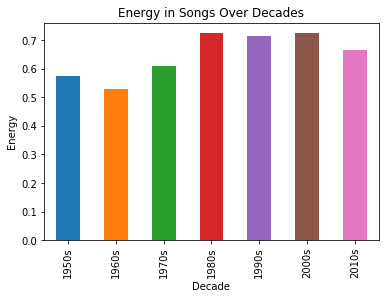

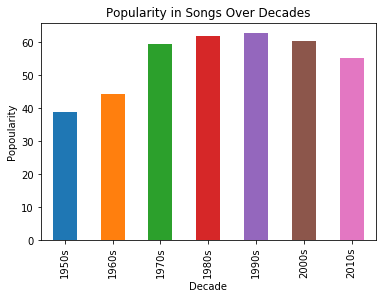

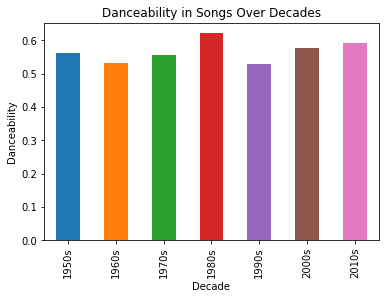

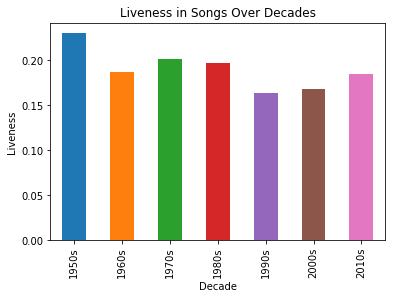

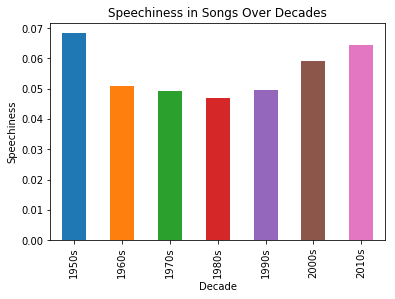

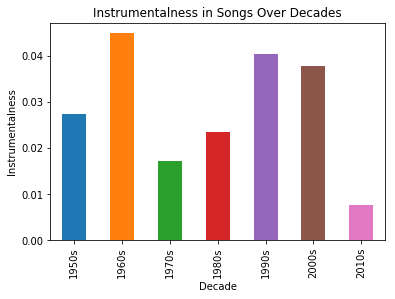

In [10]:
decades_data['energy'].groupby(decades_data['decade']).mean().plot(kind='bar')
plt.ylabel('Energy')
plt.xlabel('Decade')
plt.title('Energy in Songs Over Decades')
plt.show()

decades_data['track.popularity'].groupby(decades_data['decade']).mean().plot(kind='bar')
plt.ylabel('Popoularity')
plt.xlabel('Decade')
plt.title('Popularity in Songs Over Decades')
plt.show()

decades_data['danceability'].groupby(decades_data['decade']).mean().plot(kind='bar')
plt.ylabel('Danceability')
plt.xlabel('Decade')
plt.title('Danceability in Songs Over Decades')
plt.show()

decades_data['liveness'].groupby(decades_data['decade']).mean().plot(kind='bar')
plt.ylabel('Liveness')
plt.xlabel('Decade')
plt.title('Liveness in Songs Over Decades')
plt.show()

decades_data['speechiness'].groupby(decades_data['decade']).mean().plot(kind='bar')
plt.ylabel('Speechiness')
plt.xlabel('Decade')
plt.title('Speechiness in Songs Over Decades')
plt.show()

decades_data['instrumentalness'].groupby(decades_data['decade']).mean().plot(kind='bar')
plt.ylabel('Instrumentalness')
plt.xlabel('Decade')
plt.title('Instrumentalness in Songs Over Decades')
plt.show()

In [11]:
decades_data

,name,track.id,track.duration_ms,added_at,track.popularity,track.name,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence,decade
0,Lukas Graham,7129iqBafaphfc3WPCGC0L,237300,2018-12-01T17:58:03Z,53,7 Years,0.29000,0.742,237300,0.479,7129iqBafaphfc3WPCGC0L,0.000000,10,0.3910,-5.830,0.0551,119.951,4,0.3460,2010s
1,Coldplay,6f49kbOuQSOsStBpyGvQfA,223773,2018-12-01T17:58:03Z,69,A Head Full Of Dreams,0.00200,0.450,223773,0.920,6f49kbOuQSOsStBpyGvQfA,0.020100,11,0.3340,-4.982,0.0733,122.979,4,0.0773,2010s
2,Paramore,1j8z4TTjJ1YOdoFEDwJTQa,296520,2018-12-01T17:58:03Z,70,Ain't It Fun,0.15400,0.610,296520,0.893,1j8z4TTjJ1YOdoFEDwJTQa,0.000044,9,0.0210,-3.681,0.0921,104.031,4,0.6730,2010s
3,Kodaline,2PwXOevGUSkU8qaYZjgLq2,305746,2018-12-01T17:58:03Z,69,All I Want,0.17200,0.209,305747,0.412,2PwXOevGUSkU8qaYZjgLq2,0.150000,0,0.0843,-9.733,0.0443,86.260,3,0.1620,2010s
4,Snakehips,6TaqooOXAEcijL6G1AWS2K,229746,2018-12-01T17:58:03Z,72,All My Friends (feat. Tinashe & Chance the Rap...,0.11900,0.689,229747,0.521,6TaqooOXAEcijL6G1AWS2K,0.000084,0,0.1080,-5.845,0.1320,95.055,4,0.1780,2010s
5,Niykee Heaton,3rvLfPT9sm9UPeIr8OQA65,245722,2018-12-01T17:58:03Z,13,Bad Intentions,0.22300,0.744,245723,0.722,3rvLfPT9sm9UPeIr8OQA65,0.000000,11,0.0960,-5.140,0.0778,124.008,4,0.3930,2010s
6,Mumford & Sons,7HqtFBLJcilvyUuMav4Y5W,220866,2018-12-01T17:58:03Z,15,Believe,0.03430,0.366,220867,0.685,7HqtFBLJcilvyUuMav4Y5W,0.024800,11,0.2320,-5.910,0.0437,113.706,4,0.3690,2010s
7,American Authors,5j9iuo3tMmQIfnEEQOOjxh,194240,2018-12-01T17:58:03Z,24,Best Day Of My Life,0.06250,0.670,194240,0.905,5j9iuo3tMmQIfnEEQOOjxh,0.000151,2,0.0577,-2.385,0.0339,100.021,4,0.5160,2010s
8,George Ezra,7vjjfdum71w8bbkNSQdnDL,196626,2018-12-01T17:58:03Z,15,Blame It on Me,0.43500,0.526,196627,0.719,7vjjfdum71w8bbkNSQdnDL,0.000000,3,0.3200,-4.472,0.0281,103.849,4,0.4670,2010s
9,Raleigh Ritchie,7EHv6Eb7nQOXhO0BW5gytT,259133,2018-12-01T17:58:03Z,53,Bloodsport '15,0.02300,0.591,259133,0.559,7EHv6Eb7nQOXhO0BW5gytT,0.000000,6,0.0916,-6.319,0.0714,92.394,4,0.3480,2010s


In [12]:
#this is getting the audio features but using spotipy
import json
import spotipy
import time
import sys


tid = 'spotify:track:4TTV7EcfroSLWzXRY6gLv6'


#gets audio features with track ids
start = time.time()
features = sp.audio_features(track_ids)
delta = time.time() - start
df = json_normalize(features)
#df = json_normalize(json.dumps(features))
print(json.dumps(features, indent=4))
print ("features retrieved in %.2f seconds" % (delta,))
df

NameError: name 'sp' is not defined

In [ ]:
import time 

#could use this to analyze time signatures
start = time.time()
analysis = sp.audio_analysis(tid)
delta = time.time() - start
print(json.dumps(analysis, indent=4))
print ("analysis retrieved in %.2f seconds" % (delta,))

['years', 'old', 'momma', 'told', 'go', 'make', 'friends', 'lonely', 'years', 'old', 'big', 'big', 'world', 'thought', 'bigger', 'pushing', 'limits', 'learning', 'quicker', 'eleven', 'smoking', 'herb', 'drinking', 'burning', 'liquor', 'never', 'rich', 'make', 'steady', 'figure', 'years', 'old', 'daddy', 'told', 'go', 'get', 'wife', 'lonely', 'years', 'old', 'always', 'dream', 'like', 'daddy', 'started', 'writing', 'songs', 'started', 'writing', 'stories', 'something', 'glory', 'always', 'seemed', 'bore', 'cause', 'really', 'love', 'ever', 'really', 'know', 'years', 'old', 'story', 'got', 'told', 'morning', 'sun', 'life', 'lonely', 'years', 'old', 'lukas', 'graham', 'see', 'goals', 'believe', 'failure', 'cause', 'know', 'smallest', 'voices', 'make', 'major', 'got', 'boys', 'least', 'favor', 'meet', 'leave', 'hope', 'see', 'later', 'years', 'old', 'story', 'got', 'told', 'writing', 'bout']


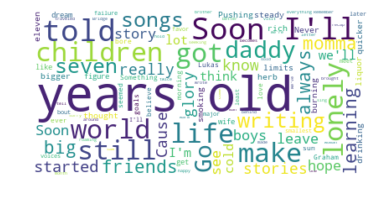

In [22]:
 # trying to get song lyrics
genius_token = 'V3BxSvKtWKcSlonUDfqeKWZmRKK3qjGyAGJCRqxm8awvuWI65nm7WFrYmnn3acIu'
def request_song_info(song_title, artist_name):
    base_url = 'https://api.genius.com'
    headers = {'Authorization': 'Bearer ' + genius_token}
    search_url = base_url + '/search'
    data = {'q': song_title + ' ' + artist_name}
    response = requests.get(search_url, data=data, headers=headers)
    return response

# Search for matches in the request response
song_title = "7 Years".lower()
artist_name = "Lukas Graham".lower()
response = request_song_info(song_title, artist_name)
json = response.json()
remote_song_info = None

for hit in json['response']['hits']:
    if artist_name.lower() in hit['result']['primary_artist']['name'].lower():
        remote_song_info = hit
        break
        
# Extract lyrics from URL if the song was found
if remote_song_info:
    song_url = remote_song_info['result']['url']

from bs4 import BeautifulSoup

def scrap_song_url(url):
    page = requests.get(url)
    html = BeautifulSoup(page.text, 'html.parser')
    lyrics = html.find('div', class_='lyrics').get_text()

    return lyrics

seven_years_lyrics = scrap_song_url(song_url)

wordcloud = WordCloud().generate(seven_years_lyrics)


from nltk.tokenize import word_tokenize

tokens = word_tokenize(seven_years_lyrics)
# convert to lower case
tokens = [w.lower() for w in tokens]
# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens]
# remove remaining tokens that are not alphabetic
words = [word for word in stripped if word.isalpha()]
# filter out stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.add("chorus")
stop_words.add("verse")
stop_words.add("nt")

words = [w for w in words if not w in stop_words]
print(words[:100])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(seven_years_lyrics)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
